For glimpse of data & parsing the raw data to target format.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use("seaborn-white")

# all

In [7]:
df = pd.DataFrame(columns=["id", "time", "longitude", "latitude"])
# for id in tqdm(range(1, 10360)):
for id in tqdm(range(1, 1000)):
    fn = f"/data/jerrylee/study/visualize_2023_fall/term_pjt/data/taxi_log/{id}.txt" 
    try:
        df_tmp = pd.read_csv(fn,header=None)
        df_tmp.columns = ["id", "time", "longitude", "latitude"]
        df = pd.concat([df, df_tmp], axis=0)
    except:
        pass

100%|██████████| 999/999 [00:53<00:00, 18.65it/s]


In [8]:
df["longitude"].quantile(0.01), df["longitude"].quantile(0.99)

(115.95999, 117.12288339999999)

In [9]:
df["latitude"].quantile(0.01), df["latitude"].quantile(0.99)

(39.5910383, 40.40394)

<AxesSubplot:>

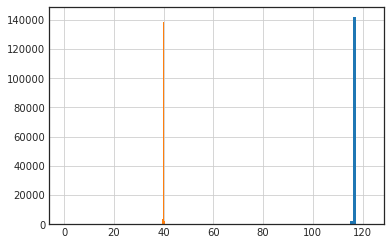

In [14]:
df["longitude"].hist(bins=100)
df["latitude"].hist(bins=100)

# by id

In [4]:
cols = ["time", "long", "lat"]
df = pd.DataFrame(columns=["id"] + [f"before_{col}" for col in cols] + [f"after_{col}" for col in cols])

# for id in tqdm(range(1, 10360)):
for id in tqdm(range(1, 50)):
    fn = f"/data/jerrylee/study/visualize_2023_fall/term_pjt/data/taxi_log/{id}.txt" 
    try:
        df_tmp = pd.read_csv(fn,
                        header=None)
        df_tmp.columns = ["id", "time", "long", "lat"]
        
        # within major region
        cond_long = (df_tmp["long"] >= 100) & (df_tmp["long"] < 125)
        cond_lat = (df_tmp["lat"] >= 25) & (df_tmp["lat"] < 50)
        df_tmp = df_tmp[cond_long & cond_lat]
        
        # Sort DataFrame by 'id' and 'date'

        # Shift the DataFrame to create "before_" and "after_" columns
        df_before = df_tmp.shift(1)
        df_after = df_tmp.shift(-1)

        # Rename columns with "before_" and "after_" prefixes
        df_before.columns = [f'before_{col}' for col in df_before.columns]
        df_after.columns = [f'after_{col}' for col in df_after.columns]

        # Concatenate the DataFrames horizontally
        result_df = pd.concat([df_before, df_after], axis=1)
        result_df = result_df.drop(columns=["before_id", "after_id"])
        result_df["id"] = id
        
        # Drop NaN rows resulting from shifting
        result_df = result_df.dropna().reset_index(drop=True)

        # Display the result
        df = pd.concat([df, result_df], axis=0)
    except:
        pass
    break

  0%|          | 0/49 [00:00<?, ?it/s]


In [6]:
df_tmp

,id,time,long,lat
0,1,2008-02-02 15:36:08,116.51172,39.92123
1,1,2008-02-02 15:46:08,116.51135,39.93883
2,1,2008-02-02 15:46:08,116.51135,39.93883
3,1,2008-02-02 15:56:08,116.51627,39.91034
4,1,2008-02-02 16:06:08,116.47186,39.91248
...,...,...,...,...
583,1,2008-02-08 15:11:31,116.48347,39.91954
584,1,2008-02-08 15:21:31,116.50789,39.93128
585,1,2008-02-08 15:31:31,116.53174,39.91536
586,1,2008-02-08 15:41:31,116.57156,39.90263


In [ ]:
# 2~3 A traffic flow
# 2~3사이에 A에서 출발한 모든 차
# 2~3사이에 A로 도착한 모든 차
# 2 ack -> Z ||
# A -> Z || 2~2:10 A 

In [5]:
result_df

,before_time,before_long,before_lat,after_time,after_long,after_lat,id
0,2008-02-02 15:36:08,116.51172,39.92123,2008-02-02 15:46:08,116.51135,39.93883,1
1,2008-02-02 15:46:08,116.51135,39.93883,2008-02-02 15:56:08,116.51627,39.91034,1
2,2008-02-02 15:46:08,116.51135,39.93883,2008-02-02 16:06:08,116.47186,39.91248,1
3,2008-02-02 15:56:08,116.51627,39.91034,2008-02-02 16:16:08,116.47217,39.92498,1
4,2008-02-02 16:06:08,116.47186,39.91248,2008-02-02 16:26:08,116.47179,39.90718,1
...,...,...,...,...,...,...,...
581,2008-02-08 14:51:32,116.40047,39.92594,2008-02-08 15:11:31,116.48347,39.91954,1
582,2008-02-08 15:01:31,116.44152,39.93236,2008-02-08 15:21:31,116.50789,39.93128,1
583,2008-02-08 15:11:31,116.48347,39.91954,2008-02-08 15:31:31,116.53174,39.91536,1
584,2008-02-08 15:21:31,116.50789,39.93128,2008-02-08 15:41:31,116.57156,39.90263,1


In [3]:
df.to_csv("/data/jerrylee/study/visualize_2023_fall/term_pjt/data/taxi.csv",
          index=False)